In [ ]:
# მხოლოდ საჭიროების შემთხვევაში
!pip install pandas matplotlib


##### საჭირო მოდულების იპმპორტი

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


##### მონაცემთა წაკითხვა CSV ფაილიდან

In [2]:
df = pd.read_csv(filepath_or_buffer='Earthquakes_database.csv')
df


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,8:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,9:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


##### ზოგადი ინფორმაცია დატაფრეიმის შესახებ

In [3]:
print(f'{df.shape = }')
print(df.info())


df.shape = (23412, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizont

## L6

##### დროის სვეტების საერთო ფორმატით ჩაწერა 

In [4]:
date_filt = df['Date'].str.contains('[^\d+/\d+/\d+]', regex=True)
time_filt = df['Time'].str.contains('[^\d+:\d+:\d+]', regex=True)

df.loc[date_filt, 'Date'] = pd.to_datetime(df.loc[date_filt, 'Date']).apply(lambda x: x.strftime('%m/%d/%Y'))
df.loc[time_filt, 'Time'] = pd.to_datetime(df.loc[time_filt, 'Time']).apply(lambda x: x.strftime('%H:%M:%S'))


##### ახალი სვეტების დამატება უკვე არსებული სვეტის დაშლით

In [5]:
df[['Month', 'Day', 'Year']] = df['Date'].str.split('/', expand=True)
df[['Date', 'Month', 'Day', 'Year']]


,Date,Month,Day,Year
0,1/2/1965,1,2,1965
1,1/4/1965,1,4,1965
2,1/5/1965,1,5,1965
3,1/8/1965,1,8,1965
4,1/9/1965,1,9,1965
...,...,...,...,...
23407,12/28/2016,12,28,2016
23408,12/28/2016,12,28,2016
23409,12/28/2016,12,28,2016
23410,12/29/2016,12,29,2016


##### ახალი სვეტის დამატება თარიღის და დროის გაერთიანებით

In [6]:
def day_month_zero(value: str) -> str:
    return f'{"0"*(len(str(value)) == 1)}{value}'
    
df['DateTime'] = pd.to_datetime(df.apply(lambda x: f"{x['Year']}-{day_month_zero(x['Month'])}-{day_month_zero(x['Day'])} {x['Time']}", axis=1))
df['DateTime']


0       1965-01-02 13:44:18
1       1965-01-04 11:29:49
2       1965-01-05 18:05:58
3       1965-01-08 18:49:43
4       1965-01-09 13:32:50
                ...        
23407   2016-12-28 08:22:12
23408   2016-12-28 09:13:47
23409   2016-12-28 12:38:51
23410   2016-12-29 22:30:19
23411   2016-12-30 20:08:28
Name: DateTime, Length: 23412, dtype: datetime64[ns]

##### ზედმეტი სვეტების წაშლა

In [7]:
df.drop(columns=['Date', 'Time', 'Day', 'Month', 'Year'], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Latitude                    23412 non-null  float64       
 1   Longitude                   23412 non-null  float64       
 2   Type                        23412 non-null  object        
 3   Depth                       23412 non-null  float64       
 4   Depth Error                 4461 non-null   float64       
 5   Depth Seismic Stations      7097 non-null   float64       
 6   Magnitude                   23412 non-null  float64       
 7   Magnitude Type              23409 non-null  object        
 8   Magnitude Error             327 non-null    float64       
 9   Magnitude Seismic Stations  2564 non-null   float64       
 10  Azimuthal Gap               7299 non-null   float64       
 11  Horizontal Distance         1604 non-null   float64   

##### შეუვსებელი მაგნიტუდის ტიპის მონაცემებისთვის "-" ის მინიჭება

In [8]:
df['Magnitude Type'].fillna('-', inplace=True)


## L7

##### მაგნიტუდის კატეგორიის სვეტის შექმნა კონკრეტული საზღვრების მიხედვით

In [9]:
df['Magnitude Category'] = pd.cut(
    df['Magnitude'], 
    bins=[0, 4, 5, 6, 7, 8, float('inf')], 
    labels=['Minor', 'Light', 'Moderate', 'Strong', 'Major', 'Great']
)
df


,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,...,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,DateTime,Magnitude Category
0,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18,Moderate
1,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49,Moderate
2,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58,Strong
3,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43,Moderate
4,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,...,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28 08:22:12,Moderate
23408,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,...,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28 09:13:47,Moderate
23409,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,...,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28 12:38:51,Moderate
23410,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,...,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016-12-29 22:30:19,Strong


## L9

##### რაოდენობის pivot ცხრილის აგება ათწლეულებში მიწისძვრების ტიპის და სიძლიერის მიხედვით 

In [10]:
df_pivot_table = df.pivot_table(values='Magnitude', index=df['DateTime'].dt.year//10*10, columns=['Type', 'Magnitude Category'], aggfunc='count')
df_pivot_table = df_pivot_table.reset_index().rename(columns={'DateTime': 'Decade'}).set_index('Decade')
df_pivot_table


Type               Earthquake                                   Explosion  \
Magnitude Category      Minor Light Moderate Strong Major Great     Minor   
Decade                                                                      
1960                        0     0      918    479    51     4         0   
1970                        0     0     3005    769    96     1         0   
1980                        0     0     3256    955    80     1         0   
1990                        0     0     3668   1091   111     4         0   
2000                        0     0     3943   1105   112    10         0   
2010                        0     0     2704    769    93     7         0   

Type                                      ... Nuclear Explosion               \
Magnitude Category Light Moderate Strong  ...          Moderate Strong Major   
Decade                                    ...                                  
1960                   0        0      0  ...                 4      0     0   
1970                   0        1      1  ...                57     11     0   
1980                   0        2      0  ...                71     20     0   
1990                   0        0      0  ...                 9      3     0   
2000                   0        0      0  ...                 0      0     0   
2010                   0        0      0  ...                 0      0     0   

Type                     Rock Burst                                    
Magnitude Category Great      Minor Light Moderate Strong Major Great  
Decade                                                                 
1960                   0          0     0        0      0     0     0  
1970                   0          0     0        0      0     0     0  
1980                   0          0     0        0      0     0     0  
1990                   0          0     0        0      0     0     0  
2000                   0          0     0        0      0     0     0  
2010                   0          0     0        0      1     0     0  

[6 rows x 24 columns]

##### იგივე ცხრილზე გამოყენებული stack ფუნცია

In [11]:
df_pivot_table.stack('Type')


Magnitude Category        Great  Light  Major  Minor  Moderate  Strong
Decade Type                                                           
1960   Earthquake             4      0     51      0       918     479
       Explosion              0      0      0      0         0       0
       Nuclear Explosion      0      0      0      0         4       0
       Rock Burst             0      0      0      0         0       0
1970   Earthquake             1      0     96      0      3005     769
       Explosion              0      0      0      0         1       1
       Nuclear Explosion      0      0      0      0        57      11
       Rock Burst             0      0      0      0         0       0
1980   Earthquake             1      0     80      0      3256     955
       Explosion              0      0      0      0         2       0
       Nuclear Explosion      0      0      0      0        71      20
       Rock Burst             0      0      0      0         0       0
1990   Earthquake             4      0    111      0      3668    1091
       Explosion              0      0      0      0         0       0
       Nuclear Explosion      0      0      0      0         9       3
       Rock Burst             0      0      0      0         0       0
2000   Earthquake            10      0    112      0      3943    1105
       Explosion              0      0      0      0         0       0
       Nuclear Explosion      0      0      0      0         0       0
       Rock Burst             0      0      0      0         0       0
2010   Earthquake             7      0     93      0      2704     769
       Explosion              0      0      0      0         0       0
       Nuclear Explosion      0      0      0      0         0       0
       Rock Burst             0      0      0      0         0       1

##### იგივე ცხრილი შეცვლილი ღერძებით, მიწისძვრების ტიპის და სიძლიერის რაოდენობები ათწლეულების მიხედვით

In [12]:
df_pivot_table.stack('Type').stack('Magnitude Category').unstack('Decade')


Decade                                1960  1970  1980  1990  2000  2010
Type              Magnitude Category                                    
Earthquake        Great                  4     1     1     4    10     7
                  Light                  0     0     0     0     0     0
                  Major                 51    96    80   111   112    93
                  Minor                  0     0     0     0     0     0
                  Moderate             918  3005  3256  3668  3943  2704
                  Strong               479   769   955  1091  1105   769
Explosion         Great                  0     0     0     0     0     0
                  Light                  0     0     0     0     0     0
                  Major                  0     0     0     0     0     0
                  Minor                  0     0     0     0     0     0
                  Moderate               0     1     2     0     0     0
                  Strong                 0     1     0     0     0     0
Nuclear Explosion Great                  0     0     0     0     0     0
                  Light                  0     0     0     0     0     0
                  Major                  0     0     0     0     0     0
                  Minor                  0     0     0     0     0     0
                  Moderate               4    57    71     9     0     0
                  Strong                 0    11    20     3     0     0
Rock Burst        Great                  0     0     0     0     0     0
                  Light                  0     0     0     0     0     0
                  Major                  0     0     0     0     0     0
                  Minor                  0     0     0     0     0     0
                  Moderate               0     0     0     0     0     0
                  Strong                 0     0     0     0     0     1

## L10

##### სიძლიერით დაყოფილი მიწისძვრების რაოდენობების bar ტიპის გრაფიკის აგება ათწლეულების მიხედვით

<Axes: title={'center': 'Quantity of Earthquakes'}, xlabel='Decade', ylabel='Quantity'>

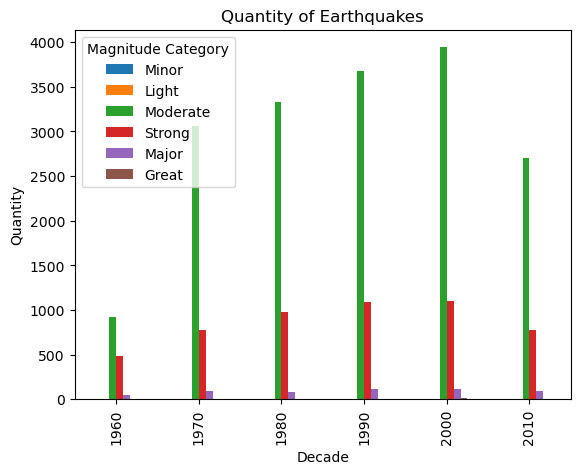

In [13]:
df.pivot_table(
    index=df['DateTime'].dt.year//10*10, 
    columns='Magnitude Category', 
    values='Magnitude', 
    aggfunc='count'
).plot(
    kind='bar', 
    title='Quantity of Earthquakes', 
    xlabel='Decade',
    ylabel='Quantity'
)


##### სიძლიერით დაყოფილი მიწისძვრების რაოდენობების pie ტიპის გრაფიკის აგება

<Axes: title={'center': 'Distribution of Strength of Earthquakes'}, ylabel='Magnitude Category'>

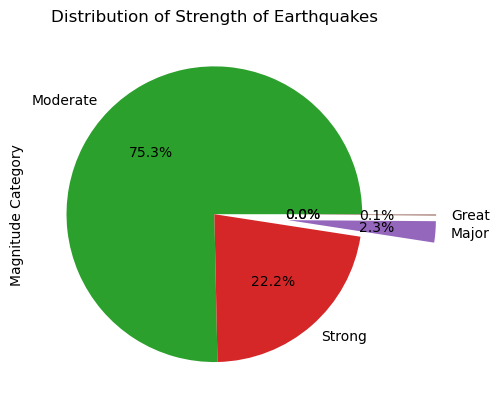

In [14]:
df.groupby('Magnitude Category')['Magnitude Category'].count().plot(
    kind='pie', 
    autopct='%.1f%%', 
    explode=[0, 0, 0, 0, 0.5, 0.5], 
    title='Distribution of Strength of Earthquakes'
)


##### მიწისძვრების სიძლიერის boxplot ტიპის გრაფიკის აგება

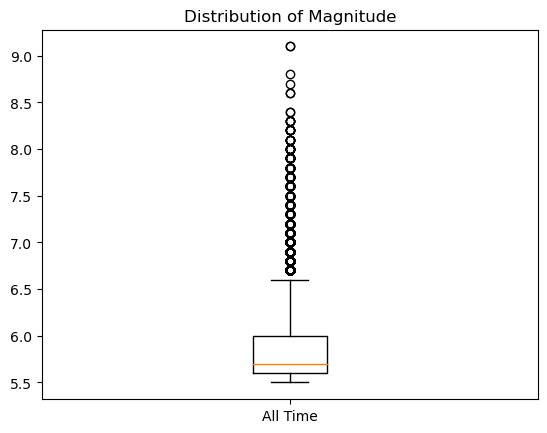

In [15]:
plt.boxplot(df['Magnitude'], labels=['All Time'])
plt.title('Distribution of Magnitude')

plt.show()


##### 2010 წლის განმავლობაში მიწისძვრების სიძლიერის ჩვენება გრაფიკზე განსხვავებული ვიზუალებით

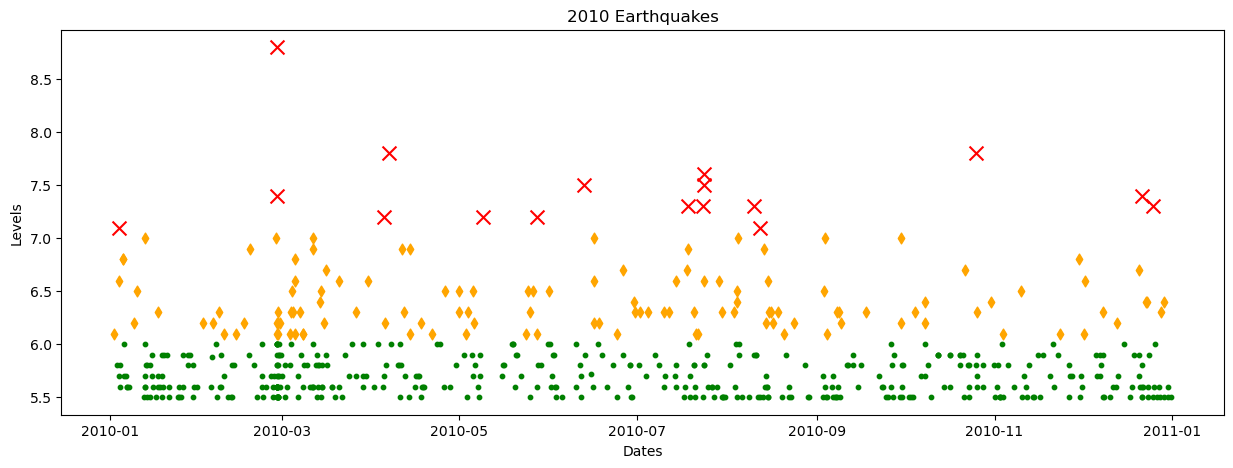

In [16]:
time_filt = df['DateTime'].dt.year == 2010
green_filt = time_filt & (df['Magnitude Category'].isin(['Minor', 'Light', 'Moderate']))
orange_filt = time_filt & (df['Magnitude Category'].isin(['Strong']))
red_filt = time_filt & (df['Magnitude Category'].isin(['Major', 'Great']))
scale = 10

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.scatter(df.loc[green_filt, 'DateTime'], df.loc[green_filt, 'Magnitude'], color='green', marker='o', s=1*scale)
ax.scatter(df.loc[orange_filt, 'DateTime'], df.loc[orange_filt, 'Magnitude'], color='orange', marker='d', s=3*scale)
ax.scatter(df.loc[red_filt, 'DateTime'], df.loc[red_filt, 'Magnitude'], color='red', marker='x', s=10*scale)
ax.set_title('2010 Earthquakes')
ax.set_xlabel('Dates')
ax.set_ylabel('Levels')

plt.show()


## L11

##### დროის სვეტის ინდექსად არჩევა

In [17]:
df.set_index('DateTime', inplace=True)
df


,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Magnitude Category
DateTime,,,,,,,,,,,,,,,,,,,,
1965-01-02 13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Moderate
1965-01-04 11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Moderate
1965-01-05 18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Strong
1965-01-08 18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Moderate
1965-01-09 13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28 08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,Moderate
2016-12-28 09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,Moderate
2016-12-28 12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,Moderate


##### კვირის დღეების მიხედვით 2015 წელს მომხდარი მიწისძვრების საშუალო მნიშვნელობების plot ტიპის გრაფიკის აგება

<Axes: xlabel='Weekday'>

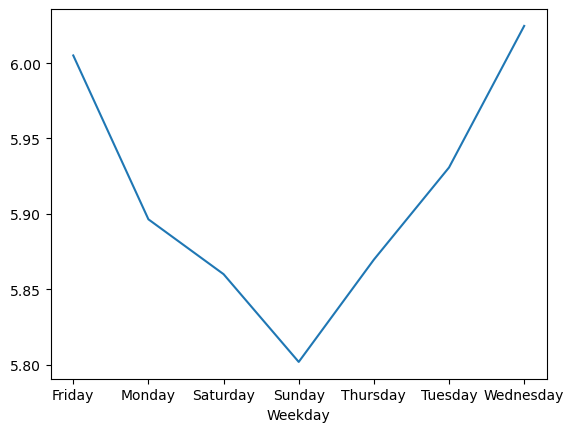

In [18]:
df['Weekday'] = df.index.day_name()
df.loc['2015'].groupby(by='Weekday')['Magnitude'].mean().plot()


##### ათწლეულების მიხედვით მაგნიტუდის საშუალო და სიღრმის მაქსიმალური მნიშვნელობები

In [19]:
df.resample('10Y').agg({'Magnitude': 'mean', 'Depth': 'max'})


,Magnitude,Depth
DateTime,,
1965-12-31,6.014159,645.00
1975-12-31,5.946938,662.00
1985-12-31,5.841630,700.00
1995-12-31,5.875548,650.00
2005-12-31,5.867872,691.60
2015-12-31,5.883254,688.00
2025-12-31,5.892836,622.54
